<a href="https://colab.research.google.com/github/jangidprashantjee185045/CNN-Computer_Vision/blob/project1/CNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib  as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
class_names=["Tshirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

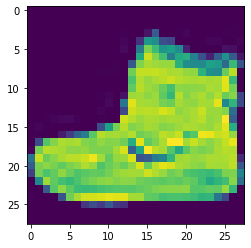

In [8]:
plt.imshow(X_train_full[0])

In [9]:
y_train_full[0]

9

In [10]:
X_train_full=X_train_full.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

In [11]:
X_train_full=X_train_full/255.0
X_test=X_test/255.0

In [16]:
X_valid,X_train=X_train_full[:5000],X_train_full[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) 

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [26]:
model_history=model.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 34s 3ms/step - loss: 0.8473 - accuracy: 0.7083 - val_loss: 0.8009 - val_accuracy: 0.7060
Epoch 2/30
860/860 [==============================] - 3s 3ms/step - loss: 0.5363 - accuracy: 0.8065 - val_loss: 0.4964 - val_accuracy: 0.8080
Epoch 3/30
860/860 [==============================] - 3s 3ms/step - loss: 0.4792 - accuracy: 0.8265 - val_loss: 0.9491 - val_accuracy: 0.6982
Epoch 4/30
860/860 [==============================] - 3s 3ms/step - loss: 0.4427 - accuracy: 0.8417 - val_loss: 0.4178 - val_accuracy: 0.8544
Epoch 5/30
860/860 [==============================] - 3s 3ms/step - loss: 0.4189 - accuracy: 0.8492 - val_loss: 0.4288 - val_accuracy: 0.8484
Epoch 6/30
860/860 [==============================] - 3s 3ms/step - loss: 0.3956 - accuracy: 0.8579 - val_loss: 0.3768 - val_accuracy: 0.8684
Epoch 7/30
860/860 [==============================] - 3s 3ms/step - loss: 0.3785 - accuracy: 0.8652 - val_loss: 0.4083 - val_accuracy: 0.8534
Epoch

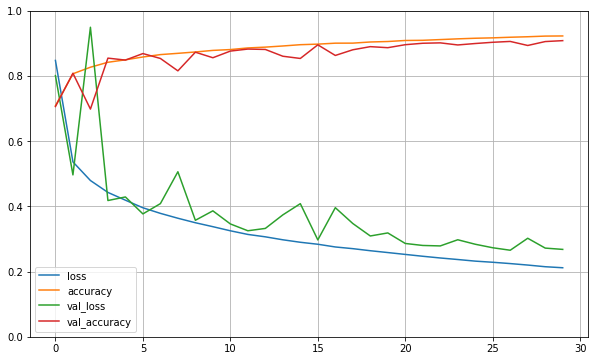

In [28]:
pd.DataFrame(model_history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
ev=model.evaluate(X_test,y_test)
ev

313/313 [==============================] - 1s 2ms/step - loss: 0.2754 - accuracy: 0.9005


[0.27538326382637024, 0.9004999995231628]

In [30]:
X_new=X_test[:5]

In [31]:
y_pred=model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1, 1, 6])

In [32]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
########################################## We have better result accuracy on test dataset compared to our previous model using ANN ################################################################